In [1]:
## load packages ##
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy as sc
from scipy import stats
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial"
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

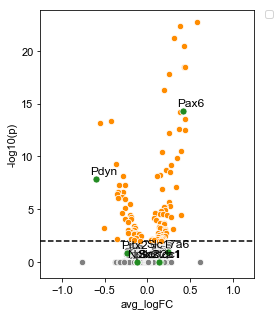

In [2]:
## load single cell and HCR DEG data (calculated in R using Seurat) for YFP and TOM cells and Plot ##

## Edit this ##
seqdir="C:\\Users\\rossiadmin\\Dropbox (Stuber Lab)\\Mark\\LHA projection paper\\Data\\Fig2 seq" ## location of file
degfile='YFPvTOM_DEGs_ALL_UPDATED210130.csv' ## Generated by Seurat 
# hcr_degfile = 'HRC_seurat_deg_output.csv'

# HCRdeg=pd.read_csv(os.path.join(seqdir,hcr_degfile))
# HCRdeg = HCRdeg.replace(to_replace=['Vglut2','Vgat'],value=['Slc17a6','Slc32a1']) ## to maintain consistency between datasets

p_thresh=1e-2 ## significance threshold for determining colors on plot
degs_of_interest=['Pax6','Sostdc1','eyfp','Slc32a1','tdtomato','Slc17a6','Nptx2','Pdyn','Pitx2']
# degs_of_interest=['Pax6','Sostdc1','YFP','Tomato','Nptx2','Pdyn','Pitx2']
## List of genes to label on final plot used for plotting labels
feature_use='avg_logFC' #'avg_logFC' or 'diff_pct'

## Til here ##

# load all data - currently not in use #
# seqdegdf=pd.read_csv(os.path.join(seqdir,'Seurat_YFP_and_Tomato_data_all_DEGs.csv'))
# seqdegdf.loc[seqdegdf.eyfp >1,'Fluor']='YFP'
# seqdegdf.loc[seqdegdf.tdtomato >1,'Fluor']='TOM'

# load DEG summary data from seurat output #
seqdeg=pd.read_csv(os.path.join(seqdir,degfile))
seqdeg['-log10p']=-log10(seqdeg['p_val_adj'])
seqdeg['sig']= 'not sig'
seqdeg.loc[seqdeg.p_val_adj < p_thresh, 'sig']='sig'
seqdeg.loc[seqdeg.p_val_adj < p_thresh, 'label']=seqdeg['Unnamed: 0']
seqdeg['diff_pct']=seqdeg['pct.1']-seqdeg['pct.2']
seqdeg['label2']=0

# HCRdeg['-log10p']=-log10(HCRdeg['p_val_adj'])
# HCRdeg['sig']= 'not sig'
# HCRdeg.loc[HCRdeg.p_val_adj < p_thresh, 'sig']='sig'
# HCRdeg.loc[HCRdeg.p_val_adj < p_thresh, 'label']=HCRdeg['Unnamed: 0']
# HCRdeg['diff_pct']=HCRdeg['pct.1']-HCRdeg['pct.2']
# HCRdeg['label2']=0

for deg in degs_of_interest:
    seqdeg.loc[seqdeg['Unnamed: 0']==deg,'label2']=deg
    seqdeg.loc[seqdeg['Unnamed: 0']==deg,'sig']='interest' 
    
#     HCRdeg.loc[HCRdeg['Unnamed: 0']==deg,'label2']=deg
#     HCRdeg.loc[HCRdeg['Unnamed: 0']==deg,'sig']='interest'

#drop eyfp and tomato columns from dataframe
seqdeg.drop([0,1],axis=0,inplace=True)
# HCRdeg.drop([0,1],axis=0,inplace=True)

dfsig=seqdeg[seqdeg['sig']=='sig']
dfnotsig=seqdeg[seqdeg['sig']=='not sig']
dfinterest=seqdeg[seqdeg['sig']=='interest']

# dfinterestHCR=HCRdeg[HCRdeg['sig']=='interest']

fig,ax = plt.subplots(figsize=(4,4.5))
# ax.set(yscale='log')
sns.scatterplot(data=dfsig,x=feature_use,y='-log10p',color='darkorange', zorder=2,s=40)
sns.scatterplot(data=dfnotsig,x=feature_use,y='-log10p',color='gray', zorder=1,s=40)
sns.scatterplot(data=dfinterest,x=feature_use,y='-log10p',color='forestgreen', zorder=3,s=50)
# sns.scatterplot(data=dfinterestHCR,x=feature_use,y='-log10p',color='red', zorder=4,s=70)
plt.xlim(-1.25,1.25)
# plt.ylim(0,100)
yline=-log10(p_thresh)
ax.axhline(yline, zorder=0,color='k',linestyle='--')

degs=seqdeg['label2'].values.tolist() #change to 'label' to plot labels for all sig genes. label2 for only degs of interest
xloc=seqdeg[feature_use].values.tolist()
yloc=seqdeg['-log10p'].values.tolist()
# degs=[x for x in degs if str(x) != 'nan']
ymin,ymax=ax.get_ylim()
xmin,xmax=ax.get_xlim()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel(feature_use,fontsize=11)
plt.ylabel('-log10(p)',fontsize=11)

# ax.fill_between((.25, -.25),-5,60,facecolor='lightgray',zorder=0)

for i,deg in enumerate(degs):
    if deg != 0:
        plt.text(xloc[i]+(xmax/5), yloc[i]+(ymax/50), deg, horizontalalignment='right', fontsize=12, color='black', weight='regular')
fig.tight_layout()
plt.savefig('SEQ_DATA_DEGs_YFPvTOM_volcano_FINAL.pdf',dpi=300,format='pdf',bbox_inches='tight')
plt.show()